## AI/ML-In Electric Vehicles

🔋 ***Problem Statement:*** *Predicting Battery Health and Range in Electric Vehicles.*

🎯 ****Objective****

*To design a machine learning model that predicts the State of Health (SoH) of lithium-ion batteries used in electric vehicles, using real sensor data such as voltage, current, temperature, and time.*
*The predicted SoH can then be used to estimate driving range and assist in battery maintenance and management.*

# This is to pridect the battery health SOH(State of health)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
battery_data=pd.read_csv("battery-5.csv")
metadata=pd.read_csv("metadata(1).csv")

In [3]:
print("Battery Data Shape:", battery_data.shape)
print("Metadata Shape:", metadata.shape)

Battery Data Shape: (429, 6)
Metadata Shape: (7565, 10)


In [4]:
print("\nBattery Data (first 5 rows):")
display(battery_data.head())

print("\nMetadata (first 5 rows):")
display(metadata.head())



Battery Data (first 5 rows):


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.186636,-0.001666,5.454957,0.0002,0.000,0.000
1,4.186626,-0.002432,5.485011,0.0002,4.203,9.297
2,4.001180,-0.995300,5.510369,1.0000,3.431,23.265
3,3.982544,-0.994923,5.581233,1.0000,3.411,36.437
4,3.968436,-0.995817,5.640744,1.0000,3.398,49.609



Metadata (first 5 rows):


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [5]:
print("\nBattery Data Info:")
battery_data.info()


Battery Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      429 non-null    float64
 1   Current_measured      429 non-null    float64
 2   Temperature_measured  429 non-null    float64
 3   Current_load          429 non-null    float64
 4   Voltage_load          429 non-null    float64
 5   Time                  429 non-null    float64
dtypes: float64(6)
memory usage: 20.2 KB


In [6]:

print("\nMetadata Info:")
metadata.info()


Metadata Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


In [7]:
# Convert numeric columns safely

metadata['Capacity'] = pd.to_numeric(metadata['Capacity'], errors='coerce')
metadata['Re'] = pd.to_numeric(metadata['Re'], errors='coerce')
metadata['Rct'] = pd.to_numeric(metadata['Rct'], errors='coerce')


In [8]:
# Drop rows without Capacity (target variable)

metadata_filtered = metadata.dropna(subset=['Capacity']).copy()

In [9]:
print("metadata_filtered shape after dropping rows with missing Capacity:", metadata_filtered.shape)
metadata_filtered.info()

metadata_filtered shape after dropping rows with missing Capacity: (2769, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 0 to 7563
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 2769 non-null   object 
 1   start_time           2769 non-null   object 
 2   ambient_temperature  2769 non-null   int64  
 3   battery_id           2769 non-null   object 
 4   test_id              2769 non-null   int64  
 5   uid                  2769 non-null   int64  
 6   filename             2769 non-null   object 
 7   Capacity             2769 non-null   float64
 8   Re                   0 non-null      float64
 9   Rct                  0 non-null      float64
dtypes: float64(3), int64(3), object(4)
memory usage: 238.0+ KB


In [10]:
# Fill missing numeric values with column mean

metadata_filtered['Re'] = metadata_filtered['Re'].fillna(metadata_filtered['Re'].mean())
metadata_filtered['Rct'] = metadata_filtered['Rct'].fillna(metadata_filtered['Rct'].mean())


In [11]:
print("\nFiltered Metadata Shape:", metadata_filtered.shape)



Filtered Metadata Shape: (2769, 10)


In [12]:
battery_data.columns

Index(['Voltage_measured', 'Current_measured', 'Temperature_measured',
       'Current_load', 'Voltage_load', 'Time'],
      dtype='object')

In [13]:
# Extract Features from Battery-5.csv

features = {
    'voltage_mean': battery_data['Voltage_measured'].mean(),
    'voltage_std': battery_data['Voltage_measured'].std(),
    'current_mean': battery_data['Current_measured'].mean(),
    'temp_mean': battery_data['Temperature_measured'].mean(),
    'voltage_load_mean': battery_data['Voltage_load'].mean(),
    'current_load_mean': battery_data['Current_load'].mean(),
    'discharge_time': battery_data['Time'].max()
}

In [14]:
# Match Battery-5 file with metadata

metadata_single = metadata_filtered[metadata_filtered['filename'] == '00005.csv']


In [15]:
# Combine features

feature_df = pd.DataFrame([features])

feature_df['ambient_temperature'] = metadata_single['ambient_temperature'].values[0]
feature_df['Re'] = metadata_single['Re'].values[0]
feature_df['Rct'] = metadata_single['Rct'].values[0]
feature_df['Capacity'] = metadata_single['Capacity'].values[0]

display(feature_df)

,voltage_mean,voltage_std,current_mean,temp_mean,voltage_load_mean,current_load_mean,discharge_time,ambient_temperature,Re,Rct,Capacity
0,3.476559,0.272495,-0.983889,8.210715,2.881352,0.988347,5650.265,4,NaN,NaN,1.524366


### Training a Model

In [16]:
# Define features (X) and target (y)

X = metadata_filtered[['ambient_temperature', 'Re', 'Rct']]
y = metadata_filtered['Capacity']

In [17]:
# Handle missing values

from sklearn.impute import SimpleImputer

soh_imputer = SimpleImputer(strategy='mean')
X_imputed = soh_imputer.fit_transform(X)

c:\Users\Family\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['Re' 'Rct']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [18]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [19]:
# Train a Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
model.fit(X_imputed,y)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
import joblib

joblib.dump(soh_imputer, "soh_imputer.joblib")

['soh_imputer.joblib']

### Evaluate the Model

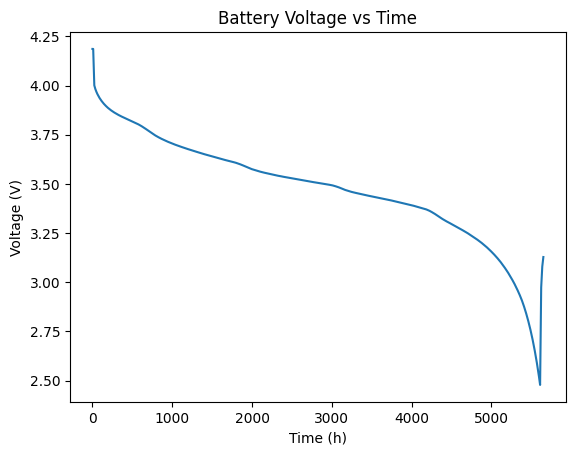

In [22]:
import matplotlib.pyplot as plt

plt.plot(battery_data['Time'], battery_data['Voltage_measured'])
plt.title("Battery Voltage vs Time")
plt.xlabel("Time (h)")
plt.ylabel("Voltage (V)")
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


📊 Model Performance:
Mean Absolute Error (MAE): 0.251
R² Score: 0.457


### Using ML Modal to Predict Battery Health-Capacity in Ah

In [27]:
# Prepare Battery-5 features for prediction

feature_input = feature_df[['ambient_temperature', 'Re', 'Rct']]
feature_imputed = soh_imputer.transform(feature_input)

predicted_capacity = model.predict(feature_imputed)[0]
print(f"\n🔋 Predicted Capacity for Battery: {predicted_capacity:.3f} Ah")


🔋 Predicted Capacity for Battery: 0.904 Ah


c:\Users\Family\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['Re' 'Rct']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [32]:
import joblib

joblib.dump(model, "SOH_model.joblib")

['SOH_model.joblib']

In [28]:
# Compute State of Health (SOH)

nominal_capacity = 1.1  # Assume nominal capacity (Ah)
soh = (predicted_capacity / nominal_capacity) * 100
print(f"🩺 Estimated Battery Health (SOH): {soh:.2f}%")

🩺 Estimated Battery Health (SOH): 82.17%


In [29]:
#  Conclusion
Battery_health=format(soh)
print("Model can be improved with more data and time-series features.")
print(Battery_health)

Model can be improved with more data and time-series features.
82.1668153811683


### ⚙️  Predict EV Range from Battery Health

In [30]:

data = {
    'SOH': [100, 95, 90, 85, 80, 75, 70, 65, 60],
    'efficiency_km_per_kWh': [6.0, 5.9, 5.8, 5.7, 5.6, 5.5, 5.4, 5.2, 5.0],
    'ambient_temp': [25, 27, 29, 30, 32, 33, 34, 36, 38],
    'terrain_factor': [1.0, 1.0, 1.0, 0.9, 0.9, 0.8, 0.8, 0.7, 0.7],  # 1=flat, 0.7=hilly
    'vehicle_weight_kg': [1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],  # Weight in kg
    'range_km': [240, 225, 210, 190, 175, 160, 145, 130, 115]
}

In [31]:
df = pd.DataFrame(data)

### range prediction modal

In [32]:
### range prediction modal

X_range = df[['SOH', 'efficiency_km_per_kWh', 'ambient_temp', 'terrain_factor', 'vehicle_weight_kg']]
y_range = df['range_km']

# Create imputer
range_imputer = SimpleImputer(strategy='mean')
X_range_imputed = range_imputer.fit_transform(X_range)

# Train Model
range_model = RandomForestRegressor(n_estimators=200, random_state=42)
range_model.fit(X_range_imputed, y_range)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [33]:
joblib.dump(range_model, "range_model.joblib")
joblib.dump(range_imputer, "range_imputer.joblib")

['range_imputer.joblib']

# Predict Range for your Battery-5 (SOH)

In [35]:
# Predict Range for your Battery-5 (SOH)

SOH = Battery_health  # From your earlier model
efficiency = 5.7  # assume average efficiency
temp = 30
terrain = 0.9  # slightly hilly
vehicle_weight = 1500  # Vehicle weight in kg
print(SOH)

82.1668153811683


In [36]:

input_data = pd.DataFrame([[SOH, efficiency, temp, terrain, vehicle_weight]], 
                         columns=['SOH', 'efficiency_km_per_kWh', 'ambient_temp', 'terrain_factor', 'vehicle_weight_kg'])

predicted_range = range_model.predict(input_data)[0]
print(f"\n🚗 Estimated Driving Range: {predicted_range:.1f} km")
print(f"📊 Prediction Input: SOH={SOH}%, Weight={vehicle_weight}kg, Efficiency={efficiency}km/kWh, Terrain={terrain}, Temp={temp}°C")


🚗 Estimated Driving Range: 186.5 km
📊 Prediction Input: SOH=82.1668153811683%, Weight=1500kg, Efficiency=5.7km/kWh, Terrain=0.9, Temp=30°C


c:\Users\Family\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
